In [ ]:
import binascii
import hashlib
import os

📦 Dependências

In [ ]:
!pip install mnemonic
!pip install eth-keys

## 🔐 Derivação de Chave com Scrypt

O `scrypt` é uma função de derivação de chave (KDF — *Key Derivation Function*) projetada para dificultar ataques de força bruta ou ataques com hardware especializado (como GPUs ou ASICs).

#### 📌 Parâmetros usados neste exemplo:
- user_password = '123456' → senha de entrada, convertida para bytes
- salt = '' → string vazia convertida com binascii.unhexlify(salt) (⚠️ não recomendado — o salt deve ser aleatório)
- n_scrypt = 8192 → custo computacional (deve ser potência de 2, por exemplo, 2¹³)
- r_scrypt = 8 → define o uso de memória (valores típicos: 8, 16, 32)
- p_scrypt = 1 → grau de paralelismo (pode ser aumentado se o sistema permitir)
- dklen = 32 → tamanho da chave derivada (32 bytes = 256 bits)

#### ⚠️ Recomendações:

    Sempre use um salt aleatório e único para cada senha.

    Ajuste os parâmetros n, r e p com base nos recursos disponíveis do sistema e no nível de segurança desejado.

    Um dklen de 32 é suficiente para a maioria dos usos com criptografia simétrica (ex: AES-256).

    A escolha correta dos parâmetros impacta diretamente a segurança e a performance da derivação.

📌 Parâmetros usados neste exemplo:

- user_password →  convertido para bytes
- salt → string vazia convertida com binascii.unhexlify(salt) (⚠️ não recomendado — o salt deve ser aleatório)
- n_scrypt → custo computacional (deve ser potência de 2)
- r_scrypt → define o uso de memória em bytes
- p_scrypt → grau de paralelismo 
- dklen → tamanho da chave derivada (32 bytes = 256 bits)


In [ ]:
user_password='123456'
password_bytes = user_password.encode('utf-8')

salt=''
salt_bytes=binascii.unhexlify(salt)

n_scrypt=8192
r_scrypt=8
p_scrypt=1
dklen=32

A chamada típica em Python (com `hashlib`) tem esta forma:

```python
derived_key = hashlib.scrypt(
    password_bytes,        # Senha original em bytes
    salt=salt_bytes,       # Salt (valor aleatório e público) em bytes
    n=n_scrypt,            # Fator de custo computacional (potência de 2)
    r=r_scrypt,            # Parâmetro que define o uso de memória
    p=p_scrypt,            # Grau de paralelismo (quantas execuções em paralelo)
    dklen=dklen            # Tamanho desejado da chave derivada (em bytes)
)
```

In [ ]:
print(f"Derivando chave com Scrypt para a senha: '{user_password}'...")
# derived_key = scrypt.hash(password_bytes, salt_bytes, N=n_scrypt, r=r_scrypt, p=p_scrypt, buflen=dklen)
derived_key = hashlib.scrypt(password_bytes, salt=salt_bytes, n=n_scrypt, r=r_scrypt, p=p_scrypt, dklen=dklen)
print(f"Chave Derivada por (hex): {binascii.hexlify(derived_key).decode()}")

In [ ]:
salt_bytes=os.urandom(16)  # Gera um salt aleatório de 16 bytes
derived_key = hashlib.scrypt(password_bytes, salt=salt_bytes, n=n_scrypt, r=r_scrypt, p=p_scrypt, dklen=dklen)
print(f"Chave Derivada por (hex): {binascii.hexlify(derived_key).decode()}")

Agora vamos utiliza um kdf com hmac

```python
hashlib.pbkdf2_hmac(
    hash_name,     # Nome do hash ('sha256', 'sha512', etc.)
    password,      # Senha (em bytes)
    salt,          # Salt (em bytes)
    iterations,    # Número de iterações (>= 100.000 é recomendado)
    dklen=None     # Tamanho da chave final (em bytes, opcional)
)
```

In [ ]:
# Parâmetros
# os demais parametros sao os mesmos
iterations = 100_000         # Número de iterações
dklen = 32                   # Tamanho da chave derivada (em bytes), o mesmo do exemplo anterior
hash_name = 'sha256'         # Algoritmo HMAC a ser usado


# Derivação da chave
derived_key = hashlib.pbkdf2_hmac(hash_name, 
                                  password_bytes, 
                                  salt_bytes, 
                                  iterations, 
                                  dklen)

# Exibir resultado
print(f"Senha original: {user_password}")
print(f"Salt (hex): {binascii.hexlify(salt_bytes).decode()}")
print(f"Chave derivada (hex): {binascii.hexlify(derived_key).decode()}")


# Derivação de Chave para Ethereum a partir de Frase Mnemônica (BIP-39)

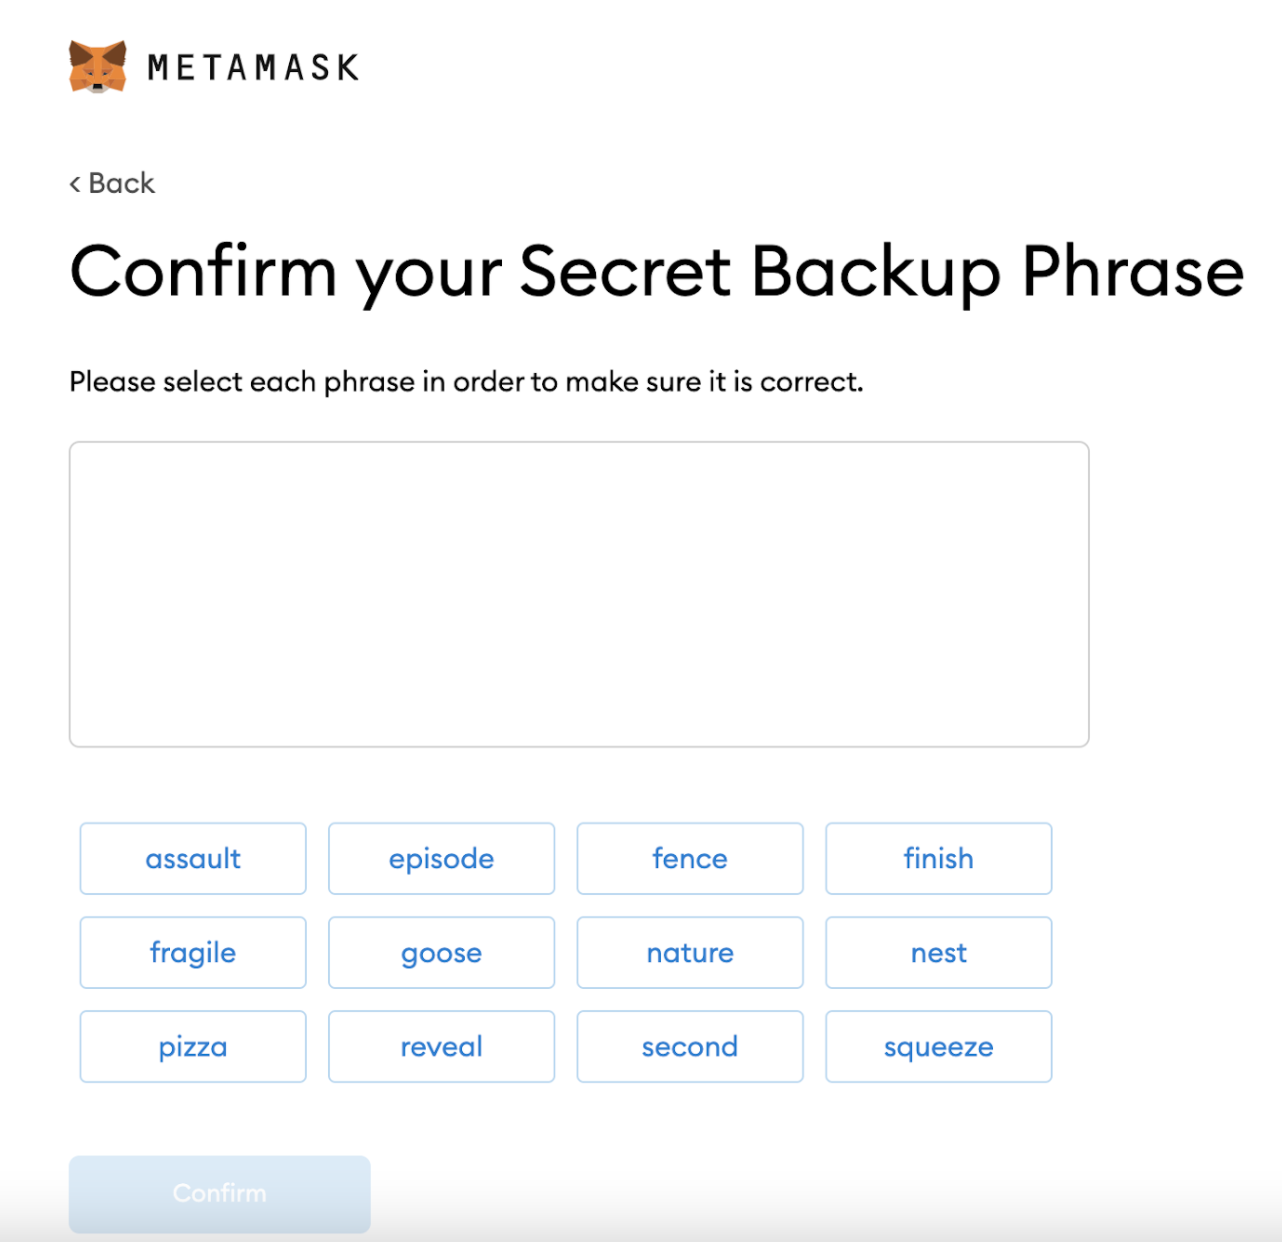


Este notebook demonstra o processo de geração de um endereço Ethereum a partir de uma frase mnemônica (palavras aleatórias) conforme os padrões **BIP-39** e **PBKDF2-HMAC-SHA512**.

O processo é amplamente utilizado por carteiras de criptomoedas como **Metamask**, **Trezor** e **Ledger**, e funciona da seguinte forma:

1. Geração de uma frase mnemônica de 12 palavras com base em entropia.
2. Derivação de uma *seed* segura utilizando a função `PBKDF2-HMAC-SHA512` (BIP-39).
3. Derivação de uma chave privada a partir da seed.
4. Geração do endereço Ethereum correspondente à chave pública.

> ⚠️ Este código é apenas para fins didáticos.

Esta célula gera uma frase mnemônica de 12 palavras em inglês (BIP-39).

Essas palavras representam uma forma de armazenar com segurança a semente criptográfica (entropia de 128 bits).

In [ ]:
from mnemonic import Mnemonic

mnemo = Mnemonic("english")
entropy_bits = 128 
mnemonic_words = mnemo.generate(strength=entropy_bits)

print("🧠 Frase mnemônica (palavras BIP-39):")
print(mnemonic_words)


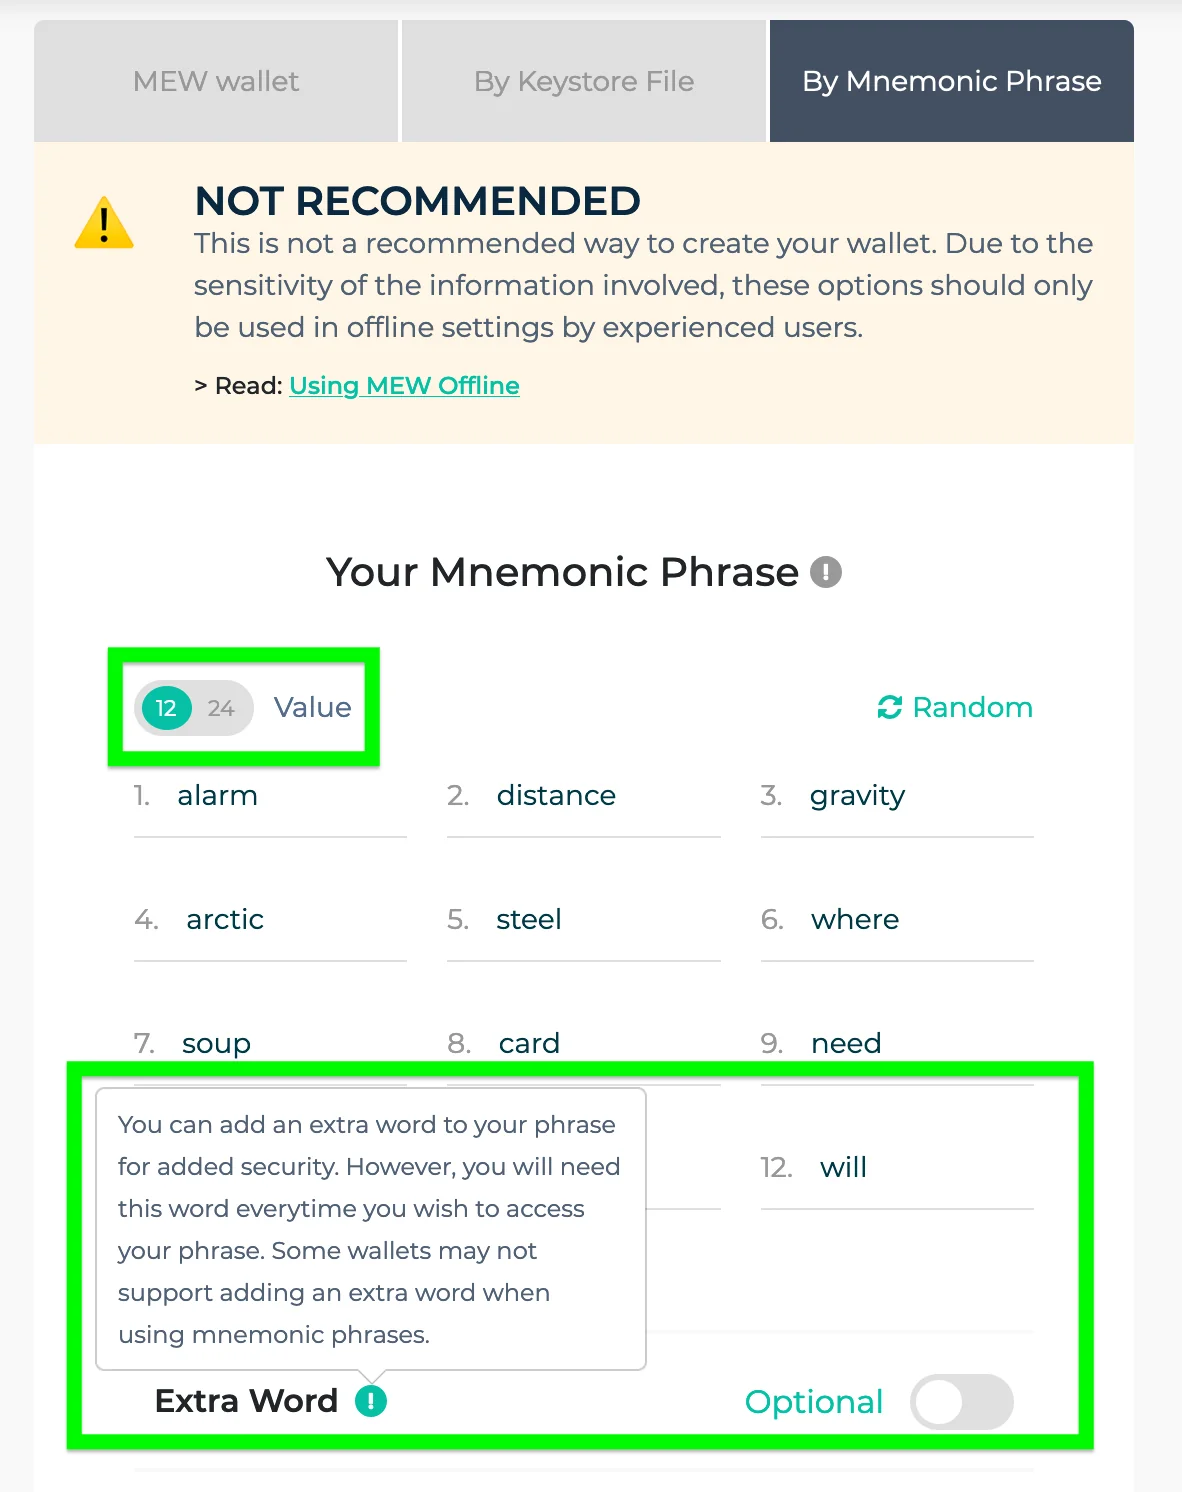

In [ ]:
passphrase = ""  

Mantendo a passphrase segura https://stackbit.me/

| | |
| :-: | :-: |
| 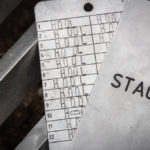 | 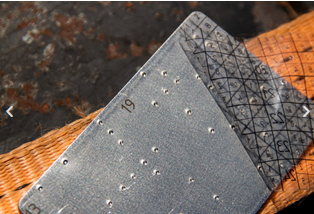 |


In [ ]:
seed = hashlib.pbkdf2_hmac(
    'sha512',
    mnemonic_words.encode('utf-8'),
    ('mnemonic' + passphrase).encode('utf-8'),
    2048,
    dklen=32
)

print("Seed da 🔑 utilizada na Ethereum (hex):")
print(binascii.hexlify(seed).decode())


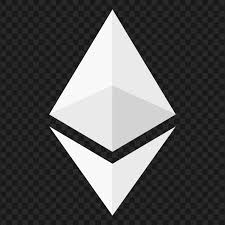

Neste exemplo, utilizando a biblioteca eth_keys,  a seed é diretamente usada como chave privada (apenas para fins educacionais).

In [ ]:
from eth_keys import keys

private_key = keys.PrivateKey(seed)
public_key = private_key.public_key
address = public_key.to_checksum_address()

print("📬 Ethereum gerado:")
print(address)


Podemos verficar no https://etherscan.io/